SearchResult containing 4 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 44 2021   SPOC     120   337646214      0.0
  1 TESS Sector 45 2021   SPOC     120   337646214      0.0
  2 TESS Sector 46 2021   SPOC     120   337646214      0.0
  3 TESS Sector 72 2023   SPOC     120   337646214      0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

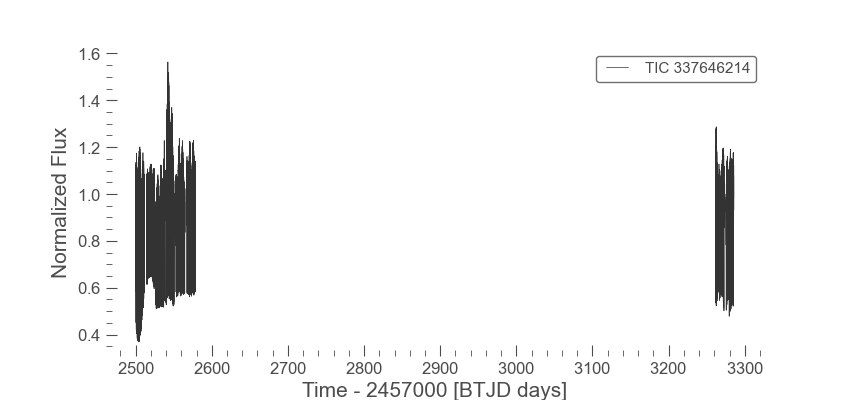

In [1]:
#Import and declare TIC

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk
from scipy.interpolate import make_interp_spline as spline
import scipy.signal as signal
import matplotlib

plt.style.use('seaborn-v0_8-darkgrid')

TIC = 'TIC 337646214'

#Download the data and stitch it together
search_results = lk.search_lightcurve(TIC, cadence='short', author='SPOC')
print(search_results)

#use_till = 4

used_result = search_results
lc = used_result.download_all().stitch()


lc.plot()

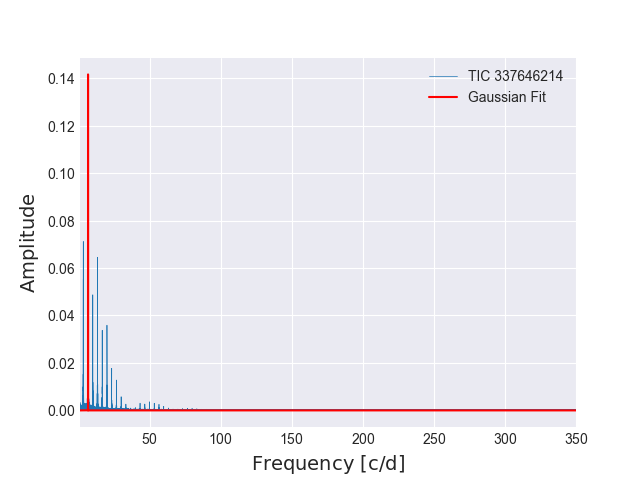

Fitted parameters:
Amplitude: 0.14156030462662347
Center: 6.656167973523942
Width: 0.008831647854052395


In [2]:
from scipy.optimize import curve_fit

def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

periodogram = lc.to_periodogram()
x = periodogram.frequency.value
y = periodogram.power.value
    
# Remove invalid values (infs and NaNs) from y and x arrays
mask_valid = ~np.isnan(y) & ~np.isinf(y)
x = x[mask_valid]
y = y[mask_valid]

# Fitting the curve to the data
initial_guess = [max(y), x[np.argmax(y)], 1]  # Initial guess for the parameters
popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)

#Get fitted values
amp_fitted, cen_fitted, wid_fitted = popt
amp_fitted = max(y)

y_fitted = gaussian(x, amp_fitted, cen_fitted, wid_fitted)

fig_LS, ax_LS = plt.subplots(1, 1, num=4)
periodogram.plot(ax=ax_LS)
ax_LS.plot(x, y_fitted, 'r-', label='Gaussian Fit')
ax_LS.set_xlabel(r'${\rm Frequency~[c/d]}$', fontsize=14)
ax_LS.set_ylabel(r'${\rm Amplitude}$', fontsize=14)
ax_LS.set_xlim(1, 350)
ax_LS.legend()
plt.show()

print(f'Fitted parameters:\nAmplitude: {amp_fitted}\nCenter: {cen_fitted}\nWidth: {wid_fitted}')

In [4]:
3.328054669

0.28312060925324695